# Distribuciones continuas (e.j. gaussiana)

Recordemos que la distribución de probabilidad normal o gaussiana está dada por:

$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

donde:

* $\mu$: media de la distribución
* $\sigma$: desviación estandar de la distribución

`Ejemplo`: considerando una variable aleatoria que sigue una distribución normal con media $\mu=4$ y desviación estándar $\sigma=0.3$, la probabilidad de que dicha variable tome el valor de $0.2$ está dada por:

$$P(0.2) =  \frac{1}{0.3 \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{0.2-4}{0.3} \right)^2 \right]}$$

Lo cual en Python se traduce en:

```python
from scipy.stats import norm

norm(mu, sigma).pdf(X)
```

---

Así también, la distribucion de probabilidad acumulada correspondiente está dada por:

$$C(X) = \int_{x\leq X} P(x)dx = \int_{- \infty}^xP(X)dX $$

teniendo en cuenta que $Dom(X) = (-\infty, \infty)$.

`Ejemplo`: considerando una variable aleatoria que sigue una distribucion normal con media $\mu=4$ y desviación estándar $\sigma=0.3$, la probabilidad de que dicha variable tome el valor de $0.2$ o menos está dada por:

$$C(0.2) = \int_{x \leq 0.2} P(x)dx = \int_{- \infty}^{0.2}  \left\{\frac{1}{0.3 \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-4}{0.3} \right)^2 \right]} \right\} dX $$

La cual se calcula en Python como:

```python
from scipy.stats import norm

norm(mu, sigma).cdf(X)
```

_**Es importante recordar que la función de probabilidad acumulada de la distribución gaussiana no se puede calcular de forma exacta, ya que la integral anterior no tiene una expresión cerrada conocida. Es decir, los métodos de integración conocidos no funcionan para resolver esta integral.**_

# Ejercicios (bloque 1)

Considerando una variable aleatoria que sigue una distribución normal con media $\mu=4$ y desviación estándar $\sigma=0.1$, calcula las siguientes probabilidades (usando Python):

1. $P(X=4)$
2. $P(X=-10)$
3. $P(X=10)$
4. $P(X \leq 4)$
6. $P(X \leq 4)$


In [14]:
from scipy.stats import norm
mu, sig = 4, 0.1

print(f"P(X = 4) = {norm(mu, sig).pdf(4)}")
print(f"P(X = -10) = {norm(mu, sig).pdf(-10)}")
print(f"P(X = 10) = {norm(mu, sig).pdf(10)}")
print(f"P(X <= 4) = {norm(mu, sig).cdf(4)}")
print(f"P(X <= 4) = {norm(mu, sig).cdf(4)}")

P(X = 4) = 3.989422804014327
P(X = -10) = 0.0
P(X = 10) = 0.0
P(X <= 4) = 0.5
P(X <= 4) = 0.5


# De la binomial a la gaussiana

En la clase 8 vimos como generar secuencias aleatorias de experimentos binomiales ([aquí](https://colab.research.google.com/drive/1MR9VZg19vHyZhvWWuxtNcy_3PZQ7AfwW?usp=sharing)), donde cada experimento era lanzar un cierto número de monedas.

**¿Qué sucede si el número consecutivo de monedas que lanzamos en cada experimento (trial) es muy largo?**

La función `generate_binomial_trials()` nos muestra lo que sucede si graficamos los resultados de muchos experimentos de lanzar 100 monedas en cada intento, con pyplot:

<BarContainer object of 42 artists>

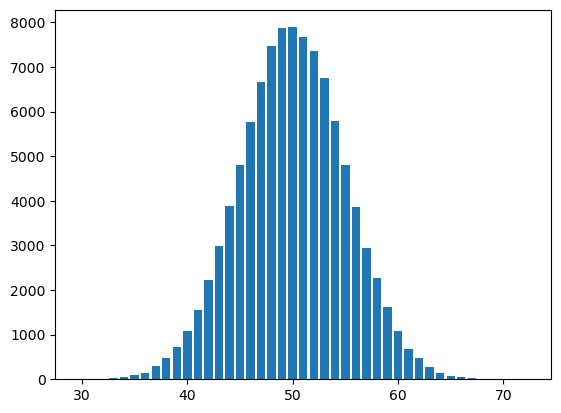

In [42]:
import numpy as np
from numpy.random import binomial
import matplotlib.pyplot as plt

def generate_binomial_trials(trials=1000, coin_toss=100):
  '''
  el resultado de esta funcion es generar un conjuntos
  de experimentos binomiales (trials) y de cada uno obtener
  las cantidades de exitos en cada secuencia (e.j. lanzar monedas).

  * trial: es una secuencia de <coin_toss> lanzamientos de moneda

  * coin_toss: es el numero de monedas lanzadas en cada trial
  '''
  arr = []
  for _ in range(trials):
    arr.append(binomial(coin_toss, 0.5))
  values, dist = np.unique(arr, return_counts=True)

  return values, dist, np.array(arr)

values, dist, sample = generate_binomial_trials(100000)
plt.bar(values, dist)

📌 **NOTA**: Añadí al retorno de la función un array con los datos generados de la simulación, con el objetivo de obtener la media y la desviación estándar, de esta manera se simula un caso real en el que se desconoce si la distribución es normal o no.

¿Se parece a algo conocido? Tal vez una ditribución normal se ajuste, para verificarlo haremos el siguiente ejercicio:

# Ejercicios (bloque 2)

1. Con los resultados anteriores guardados en `values, dist` ajusta, usando el método de estimación paramétrica, una distribución gaussiana donde la media y desviación estándar correspondan a lo calculado a partir de los datos, de la misma manera que se hizo en el notebook de la clase 9 ([aquí](https://colab.research.google.com/drive/1weFtkmxdn_WnGW582Xugj9t7Mjzxis5b?usp=sharing)).

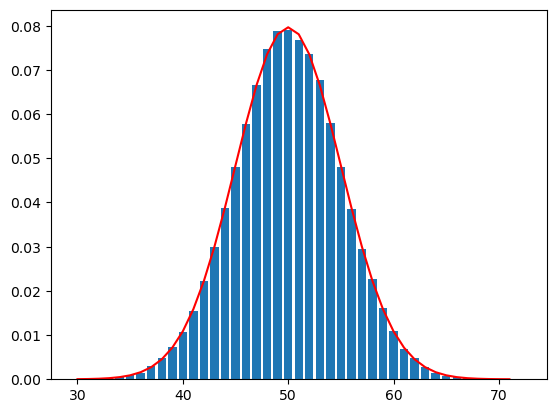

In [44]:
# escribe tu código aquí:

# 1. Obtener media y la desviación
mu = sample.mean()
sig = sample.std()

# 2. Crear una nueva distribución para la estimación
stimated_dist = norm(mu, sig)

# 3. Generar array con los valores en el rango min y max de los datos 
stimated_values = [value for value in range(sample.min(), sample.max(), 1)]

# 4. Obtenemos las probabilidades de los valores generados 
probabilities = [stimated_dist.pdf(value) for value in stimated_values]

# 5. Graficamos
 # dividimos entre la longitud de los datos para ajustar a las probabilidades.
plt.bar(values, dist/len(sample))
plt.plot(stimated_values, probabilities, 'r')
plt.show()

Si todo salió bien, habrás notado que en efecto una distribución normal se ajusta perfectamente a los datos. Esto se conoce como el **teorema del límite central**, el cual establece que en muchas situaciones conocidas, cuando variables aleatorias independientes se combinan, su total tiende a seguir una distribución normal cuando el número de variables que se combinan es muy grande $n \rightarrow \infty$.